# Benchmark the Borehole test function

In [1]:
import openturns as ot
import otbenchmark as otb
import openturns.viewer as otv

In [2]:
problem = otb.BoreholeSensitivity()

In [3]:
print(problem)

name = Borehole
distribution = ComposedDistribution(Normal(mu = 0.1, sigma = 0.0161812), LogNormal(muLog = 7.71, sigmaLog = 1.0056, gamma = 0), Uniform(a = 63070, b = 115600), Uniform(a = 990, b = 1110), Uniform(a = 63.1, b = 116), Uniform(a = 700, b = 820), Uniform(a = 1120, b = 1680), Uniform(a = 9855, b = 12045), IndependentCopula(dimension = 8))
function = [rw,r,Tu,Hu,Tl,Hl,L,Kw]->[(2*pi_*Tu*(Hu-Hl))/(ln(r/rw)*(1+(2*L*Tu)/(ln(r/rw)*rw^2*Kw)+Tu/Tl))]
firstOrderIndices = [0.66,0,0,0.09,0,0.09,0.09,0.02]
totalOrderIndices = [0.69,0,0,0.11,0,0.11,0.1,0.02]


In [4]:
distribution = problem.getInputDistribution()
model = problem.getFunction()

In [5]:
# Exact first and total order
exact_first_order = problem.getFirstOrderIndices()
exact_first_order

class=Point name=Unnamed dimension=8 values=[0.66,0,0,0.09,0,0.09,0.09,0.02]

In [6]:
exact_total_order = problem.getTotalOrderIndices()
exact_total_order

class=Point name=Unnamed dimension=8 values=[0.69,0,0,0.11,0,0.11,0.1,0.02]

## Plot the function

In [7]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 200
inputDesign = ot.MonteCarloExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [8]:
dimension = distribution.getDimension()
full_sample = ot.Sample(size, 1 + dimension)
full_sample[:, range(dimension)] = inputDesign
full_sample[:, dimension] = outputDesign
full_description = list(inputDesign.getDescription())
full_description.append(outputDesign.getDescription()[0])
full_sample.setDescription(full_description)

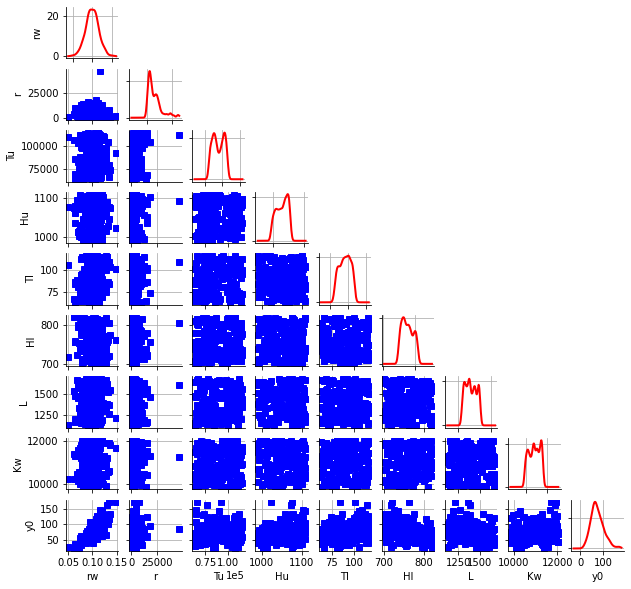

In [9]:
marginal_distribution = ot.ComposedDistribution(
    [
        ot.KernelSmoothing().build(full_sample.getMarginal(i))
        for i in range(1 + dimension)
    ]
)
clouds = ot.VisualTest.DrawPairsMarginals(full_sample, marginal_distribution)
view = otv.View(clouds, figure_kw={"figsize": (10.0, 10.0)})

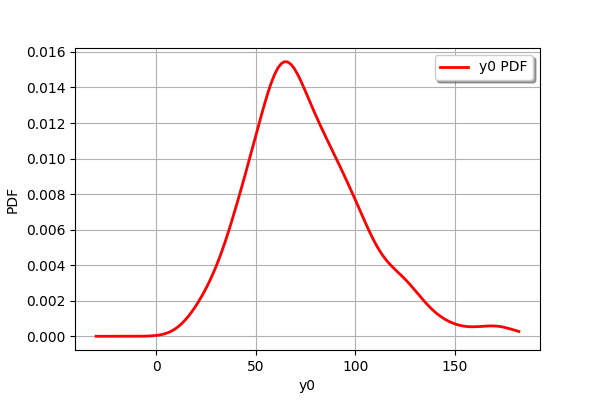

In [10]:
output_distribution = ot.KernelSmoothing().build(outputDesign)
output_distribution.drawPDF()

## Perform sensitivity analysis

In [11]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, True).generate()
outputDesign = model(inputDesign)

In [12]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
computed_first_order = sensitivityAnalysis.getFirstOrderIndices()
computed_total_order = sensitivityAnalysis.getTotalOrderIndices()

In [13]:
# Compare with exact results
print("Sample size : ", size)
# First order
# Compute absolute error (the LRE cannot be computed,
# because S can be zero)
print("Computed first order = ", computed_first_order)
print("Exact first order = ", exact_first_order)
# Total order
print("Computed total order = ", computed_total_order)
print("Exact total order = ", exact_total_order)

Sample size :  10000
Computed first order =  [0.673703,0.00700623,0.00702323,0.0955104,0.00698078,0.106341,0.0916083,0.0282982]
Exact first order =  [0.66,0,0,0.09,0,0.09,0.09,0.02]
Computed total order =  [0.699655,-5.6806e-05,-4.17144e-08,0.0973252,9.77582e-05,0.10329,0.0952783,0.0247262]
Exact total order =  [0.69,0,0,0.11,0,0.11,0.1,0.02]


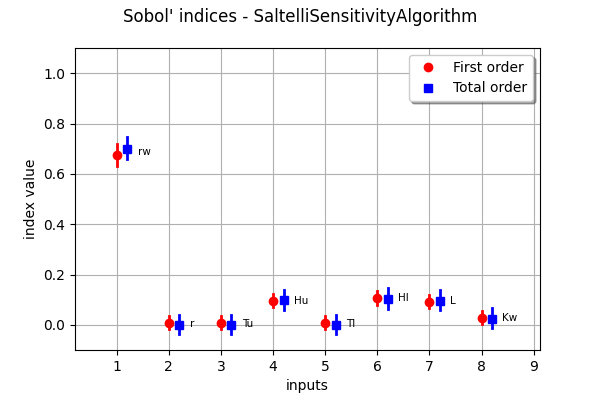

In [14]:
sensitivityAnalysis.draw()